# UBS Hackathon Thursday
## 1)  up data

done

## 2) Problem Development
### Decide on a problem space
- team performance
- employee eating habits
- understand geographical differences in bank deposits

## Possible outputs:
    - calculator - gender paygap
    - visualisation of clusters

## Key results:
    - as a graduate, which industry for lowest gender paygap
    


## Success metric?
- Become a reliable predictor for gender pay gap in future - especially over the years with new data
- Using the tool in future to compare year on year industry shifts?

In [9]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
## read gender paygap csv data
df = pd.read_csv('data/UK Gender Pay Gap Data - 2018 to 2019.csv')

In [63]:
## read gender paygap csv data
sic = pd.read_csv('data/SIC07_CH_condensed_list_en.csv')
sic.head()

In [ ]:
## see the data
df.head()

In [65]:


sic=sic.rename(columns = {'SIC Code':'SicCodes'})

In [8]:
## describe data used to understand data counts, min, max and ensure they are appropriate
df.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000
mean,12.781192,10.947667,4.302800,-3.827925,36.631515,36.154630,45.356066,54.643934,49.287150,50.712850,53.383274,46.616726,58.859153,41.140847
std,13.154391,14.930882,389.044293,398.507864,38.164828,38.064919,23.356053,23.356053,25.319961,25.319961,25.205152,25.205152,23.969687,23.969687
min,-65.000000,-67.500000,-13934.000000,-13934.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,28.100000,38.700000,30.000000,30.000000,34.000000,24.800000,40.300000,21.400000
50%,11.500000,9.000000,12.100000,0.000000,18.800000,18.300000,43.000000,57.000000,46.000000,54.000000,51.000000,49.000000,60.500000,39.500000
75%,21.000000,19.900000,49.500000,32.700000,80.000000,79.000000,61.300000,71.900000,70.000000,70.000000,75.200000,66.000000,78.600000,59.700000
max,66.000000,66.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


T:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


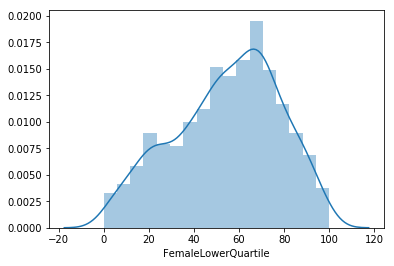

In [11]:
import seaborn as sn

sn.distplot(df['FemaleLowerQuartile'])

In [15]:
## Keep only relevant variables in our data
df2 = df[["SicCodes","DiffMedianHourlyPercent","FemaleLowerQuartile","MaleLowerQuartile","FemaleTopQuartile","MaleTopQuartile"]]

In [24]:
s = 'hkkd,dhjkf,djhkj'
print(s)
s = s.split(',')[1]
print(s)

hkkd,dhjkf,djhkj
dhjkf


In [16]:
df2.head()

,SicCodes,DiffMedianHourlyPercent,FemaleLowerQuartile,MaleLowerQuartile,FemaleTopQuartile,MaleTopQuartile
0,78109,-2.0,33.9,66.1,47.0,53.0
1,56103,0.0,69.0,31.0,70.0,30.0
2,"20301,\r\n23910,\r\n32990",6.0,40.0,60.0,29.0,71.0
3,43342,0.0,13.0,87.0,12.0,88.0
4,46720,-3.7,14.1,85.9,17.4,82.6


In [40]:
# Cleaning out unnecessary rows
df2 = df2.dropna()

In [41]:
industry_codes_df = df2
industry_codes_df["SicCodes"] = industry_codes_df['SicCodes'].str.extract('(\d+)', expand=False)
industry_codes_df

T:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SicCodes,DiffMedianHourlyPercent,FemaleLowerQuartile,MaleLowerQuartile,FemaleTopQuartile,MaleTopQuartile
0,78109,-2.0,33.9,66.1,47.0,53.0
1,56103,0.0,69.0,31.0,70.0,30.0
2,20301,6.0,40.0,60.0,29.0,71.0
3,43342,0.0,13.0,87.0,12.0,88.0
4,46720,-3.7,14.1,85.9,17.4,82.6
5,10910,-7.4,37.9,62.1,26.8,73.2
6,10890,-11.1,34.0,66.0,45.3,54.7
7,55100,3.5,54.7,45.3,50.9,49.1
8,87100,7.6,73.3,26.7,87.0,13.0
9,18110,13.3,66.0,34.0,36.0,64.0


In [68]:
## change SIC Code data type in industry_codes_df dataset
industry_codes_df["SicCodes"] = pd.to_numeric(industry_codes_df["SicCodes"])

T:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
industry_codes_df.dtypes

SicCodes                     int64
DiffMedianHourlyPercent    float64
FemaleLowerQuartile        float64
MaleLowerQuartile          float64
FemaleTopQuartile          float64
MaleTopQuartile            float64
dtype: object

In [73]:
## Now merge SIC COdes
## Clean Sic Code as we can see multiple sic codes
## Assumption - first sic code is the primary business
industry_codes_df_merged = pd.merge(industry_codes_df,
                 sic,
                 on='SicCodes')
industry_codes_df_merged.head()

,SicCodes,DiffMedianHourlyPercent,FemaleLowerQuartile,MaleLowerQuartile,FemaleTopQuartile,MaleTopQuartile,Description
0,78109,-2.0,33.9,66.1,47.0,53.0,Other activities of employment placement agencies
1,78109,14.4,15.5,84.5,23.5,76.5,Other activities of employment placement agencies
2,78109,-10.5,18.2,81.8,31.8,68.2,Other activities of employment placement agencies
3,78109,0.0,29.0,71.0,21.0,79.0,Other activities of employment placement agencies
4,78109,0.0,85.0,15.0,87.6,12.4,Other activities of employment placement agencies


In [77]:
## dropping sic codes as no longer needed
industry_codes_df_merged = industry_codes_df_merged.drop(['SicCodes'], axis=1)

In [78]:
## melt data
melted_df = pd.melt(industry_codes_df_merged,["Description"], var_name="Metric", value_name="Value")
melted_df = melted_df.sort_values(by=["Description"])
melted_df.head(10)

,Description,Metric,Value
2903,Accounting and auditing activities,MaleLowerQuartile,52.6
777,Accounting and auditing activities,DiffMedianHourlyPercent,19.0
776,Accounting and auditing activities,DiffMedianHourlyPercent,15.0
3965,Accounting and auditing activities,FemaleTopQuartile,25.0
3966,Accounting and auditing activities,FemaleTopQuartile,24.8
5028,Accounting and auditing activities,MaleTopQuartile,75.0
1840,Accounting and auditing activities,FemaleLowerQuartile,47.4
1839,Accounting and auditing activities,FemaleLowerQuartile,32.0
2902,Accounting and auditing activities,MaleLowerQuartile,68.0
5029,Accounting and auditing activities,MaleTopQuartile,75.2


In [79]:
## Now take averages of each Metric
melted_df.groupby(['Description', 'Metric']).mean().reset_index()

,Description,Metric,Value
0,Accounting and auditing activities,DiffMedianHourlyPercent,17.000000
1,Accounting and auditing activities,FemaleLowerQuartile,39.700000
2,Accounting and auditing activities,FemaleTopQuartile,24.900000
3,Accounting and auditing activities,MaleLowerQuartile,60.300000
4,Accounting and auditing activities,MaleTopQuartile,75.100000
5,Activities auxiliary to financial intermediati...,DiffMedianHourlyPercent,20.150000
6,Activities auxiliary to financial intermediati...,FemaleLowerQuartile,61.300000
7,Activities auxiliary to financial intermediati...,FemaleTopQuartile,35.850000
8,Activities auxiliary to financial intermediati...,MaleLowerQuartile,38.700000
9,Activities auxiliary to financial intermediati...,MaleTopQuartile,64.150000


In [80]:
## visualise each of the Metric values by industry
## for this we need to first visualise by overall data regardless of industry

Overall_Paygap = melted_df.groupby(['Metric']).mean().reset_index()



In [81]:
Overall_Paygap

,Metric,Value
0,DiffMedianHourlyPercent,10.329069
1,FemaleLowerQuartile,51.196896
2,FemaleTopQuartile,37.124553
3,MaleLowerQuartile,48.803104
4,MaleTopQuartile,62.875447


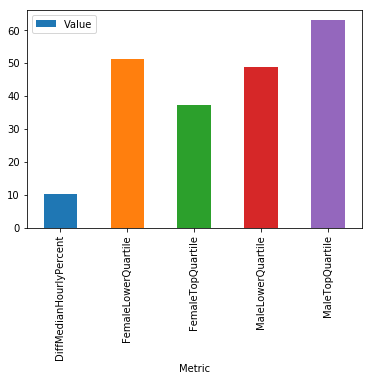

In [82]:
Overall_Paygap.plot.bar(x='Metric',y='Value')


In [83]:
## MVP - specify minimum requirement of pay as a female graduate, and get a list of industries
MVP_df = melted_df.groupby(['Description', 'Metric']).mean().reset_index()

In [84]:
## Filters are applied to MVP_df to get to a list of industries viable
## Define variables that are important to the graduate

Desired_Metric = 'DiffMedianHourlyPercent'
Desired_Value = 0
print(Desired_Metric)
print(Desired_Value)

DiffMedianHourlyPercent
0


In [85]:
## isolate 
MVP_answer = MVP_df[(MVP_df.Metric == Desired_Metric) & (MVP_df.Value < Desired_Value)]

In [87]:
MVP_answer.sort_values(by=['Value'], ascending=True)

,Description,Metric,Value
1395,Wholesale of textiles,DiffMedianHourlyPercent,-30.950000
1405,"Wholesale of wood, construction materials and ...",DiffMedianHourlyPercent,-30.800000
530,Manufacture of lifting and handling equipment,DiffMedianHourlyPercent,-29.200000
455,Manufacture of compressors,DiffMedianHourlyPercent,-19.900000
645,Manufacture of perfumes and toilet preparations,DiffMedianHourlyPercent,-18.400000
50,Activities of political organizations,DiffMedianHourlyPercent,-15.700000
1075,Removal services,DiffMedianHourlyPercent,-14.300000
620,Manufacture of other products of wood; manufac...,DiffMedianHourlyPercent,-8.950000
655,Manufacture of plastic packing goods,DiffMedianHourlyPercent,-7.700000
1410,Wholesale trade of motor vehicle parts and acc...,DiffMedianHourlyPercent,-7.700000


## Visualisation - Hacking session

In [119]:
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_file, show, output_notebook
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

In [91]:
melted_df.head()

,Description,Metric,Value
2903,Accounting and auditing activities,MaleLowerQuartile,52.6
777,Accounting and auditing activities,DiffMedianHourlyPercent,19.0
776,Accounting and auditing activities,DiffMedianHourlyPercent,15.0
3965,Accounting and auditing activities,FemaleTopQuartile,25.0
3966,Accounting and auditing activities,FemaleTopQuartile,24.8


In [92]:
##unmelt data
transposed_df = melted_df.pivot_table(index=['Description'], columns='Metric')
transposed_df.columns = transposed_df.columns.droplevel().rename(None)

In [93]:
transposed_df.head()

,DiffMedianHourlyPercent,FemaleLowerQuartile,FemaleTopQuartile,MaleLowerQuartile,MaleTopQuartile
Description,,,,,
Accounting and auditing activities,17.000000,39.70,24.90,60.30,75.10
Activities auxiliary to financial intermediation n.e.c.,20.150000,61.30,35.85,38.70,64.15
Activities of business and employers membership organizations,0.700000,74.00,73.00,26.00,27.00
Activities of call centres,12.700000,81.00,52.00,19.00,48.00
Activities of financial services holding companies,14.583333,61.85,40.55,38.15,59.45


In [94]:
# Create a column data source from df
source = ColumnDataSource(transposed_df)

#create the figure p
p = figure(plot_width=400, plot_height=400, tools=["hover"], tooltips=[('Industry', '@Description'),('DiffMedianHourlyPercent','@DiffMedianHourlyPercent')], title='Industry choice')
,
# add circle_glyphs to the figure
p.circle('FemaleTopQuartile', 'FemaleLowerQuartile', source=source)

show(p)

In [95]:
## Creating a new column to use for colouring of the chart, which is defined on criteria below:
## 1) If FemaleUpperQ > 50 and FemaleLowerQ < 50 then 'Star choice'
## 2) If FemaleUpperQ <= 50 and FemaleLowerQ > 50 then 'Unsuitable for long terms'
## 3) If FemaleUpperQ > 50 and FemaleLowerQ > 50 then 'Long term growth'
## 4) If FemaleUpperQ <= 50 and FemaleLowerQ < 50 then 'Potentially unsuitable'

In [131]:
import numpy as np

transposed_df['Choice_Category'] = np.where(((transposed_df['FemaleTopQuartile']<=50) & (transposed_df['FemaleLowerQuartile']>50)) | ((transposed_df['FemaleTopQuartile']<=50) & (transposed_df['FemaleLowerQuartile']<=50)) , 'Unsuitable', 'Suitable')



In [132]:
transposed_df.head()

,DiffMedianHourlyPercent,FemaleLowerQuartile,FemaleTopQuartile,MaleLowerQuartile,MaleTopQuartile,Choice_Category
Description,,,,,,
Accounting and auditing activities,17.000000,39.70,24.90,60.30,75.10,Unsuitable
Activities auxiliary to financial intermediation n.e.c.,20.150000,61.30,35.85,38.70,64.15,Unsuitable
Activities of business and employers membership organizations,0.700000,74.00,73.00,26.00,27.00,Suitable
Activities of call centres,12.700000,81.00,52.00,19.00,48.00,Suitable
Activities of financial services holding companies,14.583333,61.85,40.55,38.15,59.45,Unsuitable


In [143]:
# Create a column data source from df
source = ColumnDataSource(data=transposed_df)

colormap = {'Unsuitable': 'red', 'Suitable': 'blue'}
colours = [colormap[x] for x in transposed_df['Choice_Category']]

#create the figure p
p = figure(plot_width=800, plot_height=300, tools=["hover"],tooltips=[('Industry', '@Description'),('Female Lower Q','@FemaleLowerQuartile'),('Female Top Q','@FemaleTopQuartile')], title='Industry choice',x_axis_label='Female Top Quartile', y_axis_label = 'Female Lower Quartile')


# add circle_glyphs to the figure
p.circle(transposed_df['FemaleTopQuartile'], transposed_df['FemaleLowerQuartile'], color=colours)

show(p)

In [ ]:
from bokeh import plotting as bpl
from bokeh import charts as bch
bpl.output_notebook()

In [ ]:
tooltips=[
        ('Female Upper Q', '@FemaleTopQuartile'),
        ("Female Lower Q", '@FemaleLowerQuartile')
    ]
scatter = bch.Scatter(transposed_df, x='FemaleTopQuartile', y='FemaleLowerQuartile',
                      color='Choice_Category',
                      legend="top_right",
                      tooltips=tooltips
                     )

bch.show(scatter)